# Objectives
The goal of this project is to analyse the evolution of the game of basketball in the last 20 years and to predict how the sport will be played in the future. These tasks are performed using data science and machine learning tools with official data from the National Basketball Association (NBA). The data selected is focused on the shooting statistics and the physical characteristics of the players from the 2000-01 season up to the 2020-21 season. Throughout this 20-year span there have been notable shifts in the style of play and the NBA player prototype. The experiments I present aim to prove these tendencies and to provide a forecast on how basketball will continue to evolve.

# Libraries / Shortcuts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nba_api.stats.endpoints import shotchartdetail
import json


seasons = [
    '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', 
    '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', 
    '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21'
]

# Load Data

In [19]:
# # GOAL: Web Scraping in nba.com/stats to get datasets containing all shots in a season (regular season / playoffs)

# # Do one stage at a time as API sometimes fails with regular season requests
# stage = 'Playoffs'

# # Iterate through all official games
# for season in seasons:
# 	# Get all field goald attempts (FGA)
# 	response = shotchartdetail.ShotChartDetail(
# 		team_id=0,
# 		player_id=0,
# 		context_measure_simple='FGA',
# 		season_nullable=season,
# 		season_type_all_star=stage
# 	)

# 	# Get the relevant data from our dictionary
# 	content = json.loads(response.get_json())
# 	relevant_data = content['resultSets'][0]

# 	# Get the headers and row data
# 	headers = relevant_data['headers']
# 	rows = relevant_data['rowSet']

# 	# Create pandas DataFrame
# 	all_shots = pd.DataFrame(rows)
# 	all_shots.columns = headers

# 	# print('{0} {1} -> TOTAL SHOTS: {2}'.format(season, stage, len(all_shots)))
# 	all_shots.to_csv('./Data/Shots/{0}/shots_{1}_{0}.csv'.format(stage, season))

In [43]:
# # GOAL: Create a single dataframe containing all shots from season 2000-01 to 2020-21

# stages = ['Regular Season', 'Playoffs']
# all_season_data = []

# # Iterate seasons 2000-01 up to 2020-21
# for season in seasons:
#     for stage in stages:
#         # Load current season data
#         season_data = pd.read_csv('./Data/Shots/{0}/shots_{1}_{0}.csv'.format(stage, season), index_col=0)
#         # Add season and stage columns
#         season_data[['SEASON ID', 'SEASON STAGE']] = [season, stage]
#         season_data.head()

#         all_season_data.append(season_data)  

# # Concatenate new data with all data
# all_shots = pd.concat(all_season_data, ignore_index=True)

# # Drop unnecessary columns
# all_shots.drop(
#     ['GRID_TYPE', 'GAME_EVENT_ID', 'EVENT_TYPE', 'SHOT_ATTEMPTED_FLAG', 'GAME_DATE', 'HTM', 'VTM'],
#     axis=1,
#     inplace=True)

# # Rename columns by removing underscore
# # (e.g. 'GAME_ID' -> 'GAME ID')
# column_names = {}
# for column in all_shots.columns:
#     column_names[column] = ' '.join(column.split('_'))

# all_shots.rename(columns=column_names, inplace=True)

# # Move 'SEASON ID' and 'SEASON STAGE' columns to the front
# cols_to_move = ['SEASON ID', 'SEASON STAGE']
# all_shots = all_shots[cols_to_move + [col for col in all_shots.columns if col not in cols_to_move]]

# # Renaming
# all_shots['SHOT MADE FLAG'].replace({0: False, 1: True}, inplace=True)
# all_shots['SHOT TYPE'].replace({'2PT Field Goal': 2, '3PT Field Goal': 3}, inplace=True)
# # e.g. 'Center(C)' > 'Center', 'Left Side(L)': 'Left Side'
# all_shots['SHOT ZONE AREA'] = all_shots['SHOT ZONE AREA'].str.split('(').str[0]

# # Save
# all_shots.to_csv('./Data/Shots/all_shots.csv')
# all_shots.head()

In [2]:
# Load all shots
all_shots = pd.read_csv('./Data/Shots/all_shots.csv', index_col=0)
all_shots

,SEASON ID,SEASON STAGE,GAME ID,PLAYER ID,PLAYER NAME,TEAM ID,TEAM NAME,PERIOD,MINUTES REMAINING,SECONDS REMAINING,ACTION TYPE,SHOT TYPE,SHOT ZONE BASIC,SHOT ZONE AREA,SHOT ZONE RANGE,SHOT DISTANCE,LOC X,LOC Y,SHOT MADE FLAG
0,2000-01,Regular Season,20000001,84,Latrell Sprewell,1610612752,New York Knicks,1,11,41,Jump Shot,2,In The Paint (Non-RA),Center,Less Than 8 ft.,6,-58,28,False
1,2000-01,Regular Season,20000001,947,Allen Iverson,1610612755,Philadelphia 76ers,1,11,8,Jump Shot,2,Mid-Range,Left Side Center,16-24 ft.,19,-107,167,False
2,2000-01,Regular Season,20000001,275,Allan Houston,1610612752,New York Knicks,1,10,53,Jump Shot,2,Mid-Range,Left Side,8-16 ft.,15,-151,13,False
3,2000-01,Regular Season,20000001,238,Tyrone Hill,1610612755,Philadelphia 76ers,1,10,35,Jump Shot,2,Mid-Range,Left Side,8-16 ft.,9,-94,17,False
4,2000-01,Regular Season,20000001,84,Latrell Sprewell,1610612752,New York Knicks,1,10,19,Jump Shot,2,Mid-Range,Left Side,8-16 ft.,13,-101,95,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435177,2020-21,Playoffs,42000406,203114,Khris Middleton,1610612749,Milwaukee Bucks,4,0,56,Pullup Jump shot,2,Mid-Range,Right Side,16-24 ft.,16,144,90,True
4435178,2020-21,Playoffs,42000406,1626164,Devin Booker,1610612756,Phoenix Suns,4,0,50,Jump Shot,3,Above the Break 3,Right Side Center,24+ ft.,26,105,242,False
4435179,2020-21,Playoffs,42000406,101108,Chris Paul,1610612756,Phoenix Suns,4,0,37,Pullup Jump shot,3,Above the Break 3,Center,24+ ft.,27,2,277,False
4435180,2020-21,Playoffs,42000406,101108,Chris Paul,1610612756,Phoenix Suns,4,0,11,Driving Layup Shot,2,Restricted Area,Center,Less Than 8 ft.,1,5,18,True


# Dataset Description

Every row in the dataset represents a different field-goal attempt. Therefore, the dataset contains all shots from every official game (regular season + playoffs) for every season between the 2000-01 season and 2020-21 season (both included).

Now I explain some basketball terms to grasp a better understanding of the columns' meanings.

- Each game has 4 periods of twelve minutes each. In case of a tie at the end of the 48 minutes, the game continues with extra periods of 5 minutes until there is no tie at the end of the 5 minutes. 'PERIOD' column goes up to 8, meaning there have been matches where 4 extra periods have been needed to cancel the tie.
- MINUTES REMAINING are from 0 to 12.
- SECONDS REMAINING are from 0 to 60.
- ACTION TYPE: the 'style' of the shot (e.g. Hook Shot, Jump Shot, etc.)
- SHOT TYPE: how many points the shot is worth (either 2 or 3)

SHOT LOCATIONS

- 'LOC X', 'LOC Y': X and Y coordinates of shooting location. The location is measured relative to the basket the shot is directed towards. 
    - X goes from -250 to 250 (left and right side of the court). 
    - Y goes from -52 (slightly behind the offensive basket) to 884 (the defensive basket). 
    - To visualise coordinates: https://datavizardry.files.wordpress.com/2020/01/image-4.png  
---
- 'SHOT ZONE BASIC' coordinates ranges: 
    - In The Paint (Non-RA): X (-80, 80) --- Y (-52, 138)
    - Mid-Range: X (-220, 220) --- Y (-52, 237)
    - Restricted Area: X (-39, 39) --- Y (-39, 39)
    - Right Corner 3: X (220, 250) --- Y (-51, 87)
    - Above the Break 3: X (-250, 250) --- Y (88, 419)
    - Left Corner 3: X (-250, -220) --- Y (-47, 87)
    - Backcourt: Y (420, 884)

---
 
- 'SHOT ZONE AREA' coordinates ranges:
    - Center: X (-128, 128)   
    - Left Side Center: X (-250, 50)
    - Left Side: X (-250, -41)
    - Right Side: X (41, 250)
    - Right Side Center: X (50, 250) 
    - Back Court: Y (398, 884)

---

- 'SHOT ZONE RANGE' / 'SHOT ZONE DISTANCE'   
https://www.harrodsport.com/uploads/wysiwyg/img/basketball-court-dimensions-and-markings-in-feet.png


In [29]:
print('Shape:', all_shots.shape, end='\n\n')
print('Columns:', list(all_shots.columns), end='\n\n')

Shape: (4435182, 19)

Columns: ['SEASON ID', 'SEASON STAGE', 'GAME ID', 'PLAYER ID', 'PLAYER NAME', 'TEAM ID', 'TEAM NAME', 'PERIOD', 'MINUTES REMAINING', 'SECONDS REMAINING', 'ACTION TYPE', 'SHOT TYPE', 'SHOT ZONE BASIC', 'SHOT ZONE AREA', 'SHOT ZONE RANGE', 'SHOT DISTANCE', 'LOC X', 'LOC Y', 'SHOT MADE FLAG']



# Shots per Season

## AVG Shots per Game
I analyse the amount of shots per game, instead of per season, because some seasons had different number of games due to special circumstances like COVID-19 or the 2011 NBA Lockout. To make this analysis fair, I use the per-48 minutes stats, therefore I exclude overtime periods (more minutes -> outliers). 

In [9]:
# Find 'outlier' games
num_unique_games = len(all_shots['GAME ID'].unique())

# Calculate overtime games
num_games_overtime = len(all_shots[all_shots['PERIOD'] > 4]['GAME ID'].unique())
print('{} games went into overtime ({}% of all games).'.format(num_games_overtime, round(100*(num_games_overtime/num_unique_games))))

# Not only should I exclude periods above 4, but also games where 
# less than 4 periods were played (e.g. game cancelled after start)
num_unique_games = len(all_shots['GAME ID'].unique())
num_games_less_than_4_periods = len(all_shots[all_shots['PERIOD'] < 4]['GAME ID'].unique())

if num_unique_games == num_games_less_than_4_periods:
    print('All games ({0}) had a minimum of 4 periods.'.format(num_unique_games), end='\n\n')
else:
    print('{0} games had less than 4 periods.'.format(num_unique_games-num_games_less_than_4_periods), end='\n\n')

# Total number of shot attempts in each period
print('Total shot attempts in each period (1-8):')
all_shots['PERIOD'].value_counts()

1653 games went into overtime (6% of all games).
All games (26838) had a minimum of 4 periods.

Total shot attempts in each period (1-8):


1    1160459
2    1106944
3    1085795
4    1049785
5      27575
6       3875
7        659
8         90
Name: PERIOD, dtype: int64

In [3]:
# GOAL: Get amount of 2PT and 3PT shots in each game

# Exclude games that went into overtime (i.e PERIOD > 4)
shots_per_48 = all_shots[all_shots['PERIOD'] <= 4]

# Count number of 2&3PT shots in each game
shots_per_48 = shots_per_48.groupby(['GAME ID', 'SHOT TYPE']).size().reset_index(name='COUNT')

# Add season columns
shots_per_48 = shots_per_48.merge(all_shots[['SEASON ID', 'SEASON STAGE', 'GAME ID']], on='GAME ID')
# Remove duplicates
shots_per_48 = shots_per_48.drop_duplicates().reset_index(drop=True)

shots_per_48

,GAME ID,SHOT TYPE,COUNT,SEASON ID,SEASON STAGE
0,20000001,2,117,2000-01,Regular Season
1,20000001,3,19,2000-01,Regular Season
2,20000002,2,146,2000-01,Regular Season
3,20000002,3,17,2000-01,Regular Season
4,20000003,2,128,2000-01,Regular Season
...,...,...,...,...,...
53671,42000404,3,52,2020-21,Playoffs
53672,42000405,2,127,2020-21,Playoffs
53673,42000405,3,47,2020-21,Playoffs
53674,42000406,2,116,2020-21,Playoffs


In [28]:
# GOAL: Get average amount of shots per game

# Sum number of shots in each game
sum_shots_per_48 = shots_per_48.groupby(['GAME ID', 'SEASON ID', 'SEASON STAGE']).sum().reset_index().drop('SHOT TYPE', axis=1)
    
# Calculate average number of shots per game for each season
avg_shots_per_48 = sum_shots_per_48.groupby(['SEASON ID', 'SEASON STAGE']).mean().reset_index().drop(['GAME ID'], axis=1)
avg_shots_per_48.rename(
    columns={'COUNT': 'AVG SHOTS PER 48'},
    inplace=True)

avg_shots_per_48

,SEASON ID,SEASON STAGE,AVG SHOTS PER 48
0,2000-01,Playoffs,160.028169
1,2000-01,Regular Season,159.943650
2,2001-02,Playoffs,158.408451
3,2001-02,Regular Season,161.428932
4,2002-03,Playoffs,157.181818
5,2002-03,Regular Season,160.288478
6,2003-04,Playoffs,152.682927
7,2003-04,Regular Season,158.541632
8,2004-05,Playoffs,156.845238
9,2004-05,Regular Season,159.468293


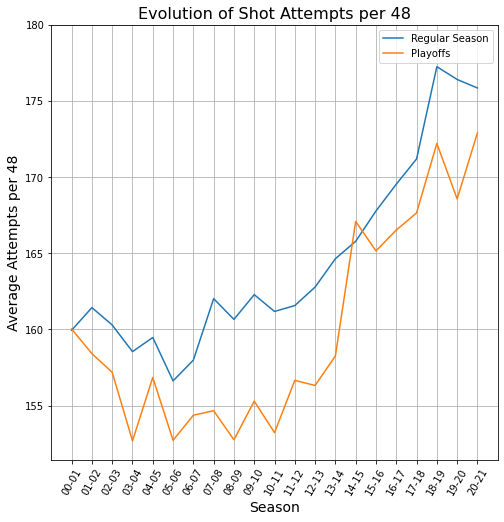

In [29]:
# Plot the table above
plt.figure(figsize=(8,8))
plt.title('Evolution of Shot Attempts per 48', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Attempts per 48', fontsize=14)

# Plot regular season and playoffs separately
for season_stage in ['Regular Season', 'Playoffs']:
    shot_data = avg_shots_per_48[avg_shots_per_48['SEASON STAGE'] == season_stage]
    plt.plot('SEASON ID', 'AVG SHOTS PER 48', data=shot_data, label=season_stage)

x_labels = [season[2:] for season in avg_shots_per_48['SEASON ID'].unique()]
plt.tick_params(axis='x', which='major', labelsize=10, rotation=60)
plt.xticks(np.arange(0,21), x_labels)
plt.yticks(np.arange(155, 185, step=5))
plt.grid(True)
plt.legend()

plt.savefig('./Graphs/Shots/Evolution of Shot Attempts per 48')

### Results
The graph above shows that the game speed has increased significantly throughout the years as teams are able to put more shots up in the same time frame (48mins). In the 2000-01 season a game had (on average) almost 160 shots. In today's games there are around 175 shots being taken.

The difference in the number of shots taken in the different season stages is also noticeable. When teams are competing in the playoffs (final stage of the competition), they take fewer shots in general because every game is decisive and each shot has to be taken wisely. This is true for all year seasons except 2000-01 and 2014-15, although the difference is minimal. 

Another factor that could be examined to explain the increase in the number of shots taken is the amount of turnovers per game. A turnover  occurs when a team loses possession of the ball to the opposing team before a player takes a shot at their team's basket.


## AVG 2&3PT per Game

In [8]:
# GOAL: Get average number of 2 and 3 pointers per 48 per season
avg_shots_per_48 = shots_per_48.groupby(['SHOT TYPE', 'SEASON ID']).mean()
avg_shots_per_48 = avg_shots_per_48.reset_index().drop(columns='GAME ID').rename(columns={'COUNT': 'AVG ATTEMPTS PER 48'})

# Average 2PT shots per 48
avg_2pt_per_48 = avg_shots_per_48[avg_shots_per_48['SHOT TYPE'] == 2]
avg_2pt_per_48.head()

,SHOT TYPE,SEASON ID,AVG ATTEMPTS PER 48
0,2,2000-01,132.824222
1,2,2001-02,132.240538
2,2,2002-03,131.269975
3,2,2003-04,128.978133
4,2,2004-05,128.295935


In [9]:
# Average 3PT shots per 48
avg_3pt_per_48 = avg_shots_per_48[avg_shots_per_48['SHOT TYPE'] == 3].reset_index(drop=True)
avg_3pt_per_48.head()

,SHOT TYPE,SEASON ID,AVG ATTEMPTS PER 48
0,3,2000-01,27.119428
1,3,2001-02,29.188394
2,3,2002-03,29.018503
3,3,2003-04,29.563499
4,3,2004-05,31.172358


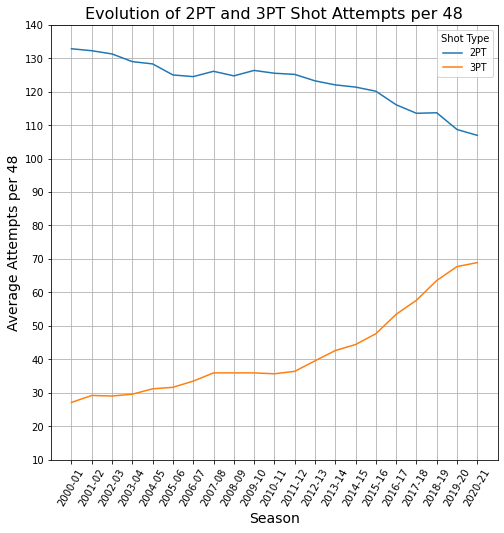

In [33]:
# Plot 2&3PT shot attempt averages per season
plt.figure(figsize=(8,8))
plt.title('Evolution of 2PT and 3PT Shot Attempts per 48', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Attempts per 48', fontsize=14)
plt.plot(avg_2pt_per_48['SEASON ID'], avg_2pt_per_48['AVG ATTEMPTS PER 48'])
plt.plot(avg_3pt_per_48['SEASON ID'], avg_3pt_per_48['AVG ATTEMPTS PER 48'])
plt.tick_params(axis='x', which='major', labelsize=10, rotation=60)
plt.yticks(np.arange(10, plt.ylim()[1]+10, step=10))
plt.grid(True)
plt.legend(['2PT', '3PT'], title='Shot Type', loc=1, fontsize=9.5)

plt.savefig('./Graphs/Shots/Evolution of 2PT and 3PT Shot Attempts per 48')

### Results
<a id='AVG 2&3PT per Game'></a>
The graph shows that the frequencies of 2PT and 3PT shots are getting closer to each other every season. Nowadays teams are not afraid to shoot a large quantity of 3s, and the emergence of teams and [players](https://en.wikipedia.org/wiki/Splash_Brothers) that are specialists in 3PT shooting has drastically influenced the way basketball is played.

# Percentages
Analyse how shot percentages have changed throughout the years.

## 3PT

In [23]:
# GOAL: Extract 3 pointers

three_pointers = all_shots[all_shots['SHOT TYPE'] == 3]
three_pointers = three_pointers.groupby(['SEASON ID', 'GAME ID', 'SHOT MADE FLAG']).size().reset_index(name='COUNT')
three_pointers # 50205 rows, but there should be 50208 (2 x number of games)

,SEASON ID,GAME ID,SHOT MADE FLAG,COUNT
0,2000-01,20000001,False,13
1,2000-01,20000001,True,6
2,2000-01,20000002,False,12
3,2000-01,20000002,True,5
4,2000-01,20000003,False,13
...,...,...,...,...
50200,2020-21,22001078,True,20
50201,2020-21,22001079,False,48
50202,2020-21,22001079,True,27
50203,2020-21,22001080,False,52


In [24]:
# GOAL: Add missing rows into made shots

# Separate makes and misses
three_pointers_made = three_pointers[three_pointers['SHOT MADE FLAG']] # 25101 (3 rows missing)
three_pointers_miss = three_pointers[~three_pointers['SHOT MADE FLAG']] # 25104

# Games where no three pointers were made
no_makes = three_pointers['GAME ID'].drop_duplicates(keep=False)

# Fill rows in no_makes (rows 6521, 7408, 9109) with 0 made shots
for game_id in no_makes:
    # Get index of game_id
    idx = three_pointers[three_pointers['GAME ID'] == game_id].index
    
    # Prepare DataFrame to insert
    made_shots = pd.DataFrame({
        'SEASON ID': three_pointers.loc[idx]['SEASON ID'],
        'GAME ID': three_pointers.loc[idx]['GAME ID'],
        'SHOT MADE FLAG': True,
        'COUNT': 0
        })
    
    # Insert missing row
    three_pointers = pd.concat([three_pointers[:idx[0]+1], made_shots, three_pointers[idx[0]+1:]], ignore_index=True)

three_pointers

,SEASON ID,GAME ID,SHOT MADE FLAG,COUNT
0,2000-01,20000001,False,13
1,2000-01,20000001,True,6
2,2000-01,20000002,False,12
3,2000-01,20000002,True,5
4,2000-01,20000003,False,13
...,...,...,...,...
50203,2020-21,22001078,True,20
50204,2020-21,22001079,False,48
50205,2020-21,22001079,True,27
50206,2020-21,22001080,False,52


In [31]:
# GOAL: Calculate 3PT percentages

# Separate makes and misses
three_pointers_made = three_pointers[three_pointers['SHOT MADE FLAG']].reset_index(drop=True) # 25104 rows
three_pointers_made = three_pointers_made.groupby(['SEASON ID']).sum()['COUNT']

three_pointers_miss = three_pointers[~three_pointers['SHOT MADE FLAG']].reset_index(drop=True) # 25104 rows
three_pointers_miss = three_pointers_miss.groupby(['SEASON ID']).sum()['COUNT']

# Calculate shot percentage
three_pointers_percentage = 100 * three_pointers_made / (three_pointers_made + three_pointers_miss)
three_pointers_percentage

SEASON ID
2000-01    35.354031
2001-02    35.350655
2002-03    34.944004
2003-04    34.716705
2004-05    35.555384
2005-06    35.830387
2006-07    35.818675
2007-08    36.197917
2008-09    36.679459
2009-10    35.453710
2010-11    35.848162
2011-12    34.864605
2012-13    35.883109
2013-14    35.975287
2014-15    35.001905
2015-16    35.381230
2016-17    35.745882
2017-18    36.175164
2018-19    35.502019
2019-20    35.794165
2020-21    36.656331
Name: COUNT, dtype: float64

## 2PT

In [26]:
# GOAL: Extract 2 pointers

two_pointers = all_shots[all_shots['SHOT TYPE'] == 2]
two_pointers = two_pointers.groupby(['SEASON ID', 'GAME ID', 'SHOT MADE FLAG']).size().reset_index(name='COUNT')
two_pointers # 50208 rows (as expected)

,SEASON ID,GAME ID,SHOT MADE FLAG,COUNT
0,2000-01,20000001,False,60
1,2000-01,20000001,True,57
2,2000-01,20000002,False,88
3,2000-01,20000002,True,58
4,2000-01,20000003,False,71
...,...,...,...,...
50203,2020-21,22001078,True,83
50204,2020-21,22001079,False,57
50205,2020-21,22001079,True,60
50206,2020-21,22001080,False,52


In [30]:
# GOAL: Calculate 2PT percentages

# Separate makes and misses
two_pointers_made = two_pointers[two_pointers['SHOT MADE FLAG']].reset_index(drop=True) # 25104 rows
two_pointers_made = two_pointers_made.groupby(['SEASON ID']).sum()['COUNT']

two_pointers_miss = two_pointers[~two_pointers['SHOT MADE FLAG']].reset_index(drop=True) # 25104 rows
two_pointers_miss = two_pointers_miss.groupby(['SEASON ID']).sum()['COUNT']

# Calculate shot percentage
two_pointers_percentage = 100*two_pointers_made / (two_pointers_made + two_pointers_miss)
two_pointers_percentage

SEASON ID
2000-01    46.106648
2001-02    46.532607
2002-03    46.271534
2003-04    45.967857
2004-05    46.990773
2005-06    47.793240
2006-07    48.532069
2007-08    48.439634
2008-09    48.525613
2009-10    49.184291
2010-11    48.713315
2011-12    47.684851
2012-13    48.300796
2013-14    48.760566
2014-15    48.517945
2015-16    49.131767
2016-17    50.325001
2017-18    51.028724
2018-19    51.953580
2019-20    52.378651
2020-21    53.023820
Name: COUNT, dtype: float64

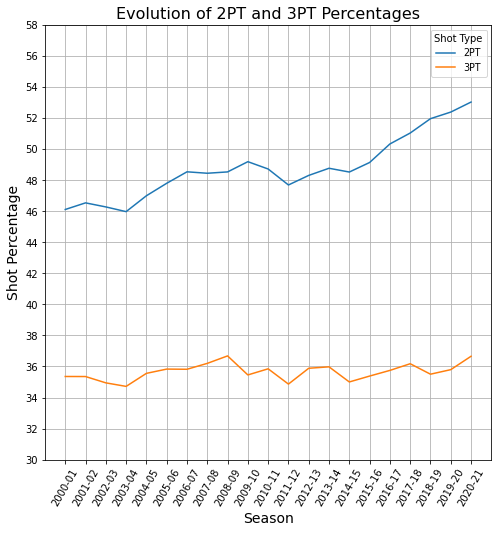

In [29]:
# GOAL: Plot 2PT and 3PT percentages together

plt.figure(figsize=(8,8))
plt.title('Evolution of 2PT and 3PT Percentages', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Shot Percentage', fontsize=14)
plt.plot(two_pointers_percentage.index, two_pointers_percentage)
plt.plot(three_pointers_percentage.index, three_pointers_percentage)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=60)
plt.yticks(np.arange(30, 60, step=2))
plt.grid(True)
plt.legend(['2PT', '3PT'], title='Shot Type', loc='best', fontsize=9.5)


plt.savefig('./Graphs/Shots/Evolution of 2PT and 3PT Percentages')

### Results
The 2PT percentage shows an improvement throughout the years, reaching the [widely pursued 50% mark](https://en.wikipedia.org/wiki/50%E2%80%9340%E2%80%9390_club) from 2016-17 up to present day. If we think about the amount of 2PT shots taken per game from section "AVG 2&3PT per Game", the decrease in the number of 2PT shots has had a positive effect on its percentage. Perhaps due to the fewer number of 2PT shots, the 2PT shot selection has improved significantly, leading to higher shot efficiency. Meanwhile the 3PT percentage has stayed more or less constant. This can be considered a good sign because the number of 3PT shots taken per 48 has increased a lot throughout the years without causing a decrease in the 3PT percentage. 

# ACTION TYPE
Analyse the usage of different kinds of shots throughout the years.
To understand what each action is (video), you can search a player's shooting stats and filter the action type (e.g. [Evan Mobley actions](https://www.nba.com/stats/player/1630596/shooting/?dir=1&sort=FGM))

In [152]:
action_types = all_shots.groupby(['SEASON ID', 'ACTION TYPE']).size().reset_index(name='COUNT')
action_types

,SEASON ID,ACTION TYPE,COUNT
0,2000-01,Alley Oop Dunk Shot,660
1,2000-01,Alley Oop Layup shot,246
2,2000-01,Driving Dunk Shot,921
3,2000-01,Driving Finger Roll Shot,263
4,2000-01,Driving Hook Shot,105
...,...,...,...
877,2020-21,Turnaround Bank Hook Shot,145
878,2020-21,Turnaround Fadeaway Bank Jump Shot,427
879,2020-21,Turnaround Fadeaway shot,2329
880,2020-21,Turnaround Hook Shot,2087


## 10 Most Used

In [231]:
# GOAL: Find 10 actions that have been used the most
actions_most_used = action_types.groupby(['ACTION TYPE']).sum().reset_index()
actions_most_used = actions_most_used.sort_values('COUNT', ascending=False).reset_index(drop=True)[:10]['ACTION TYPE']
actions_most_used = action_types[action_types['ACTION TYPE'].isin(actions_most_used)].reset_index(drop=True)
actions_most_used

,SEASON ID,ACTION TYPE,COUNT
0,2000-01,Driving Layup Shot,9637
1,2000-01,Dunk Shot,3981
2,2000-01,Hook Shot,4876
3,2000-01,Jump Shot,124866
4,2000-01,Layup Shot,27702
...,...,...,...
191,2020-21,Jump Shot,65207
192,2020-21,Layup Shot,7709
193,2020-21,Pullup Jump shot,22441
194,2020-21,Running Jump Shot,1793


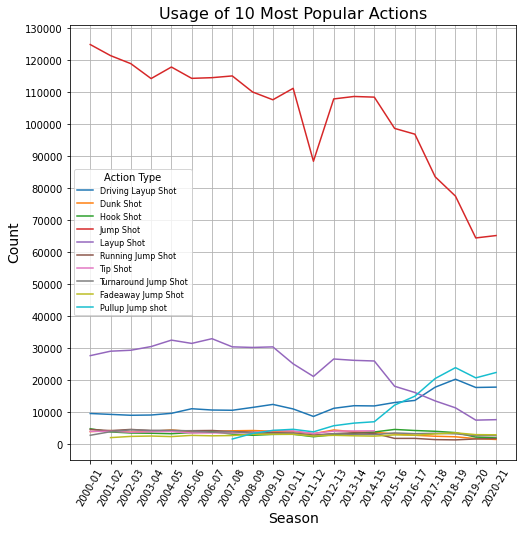

In [258]:
plt.figure(figsize=(8,8))
plt.title('Usage of 10 Most Popular Actions', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=60)
plt.grid(True)

for action in actions_most_used['ACTION TYPE'].unique():
    action_series = actions_most_used[actions_most_used['ACTION TYPE'] == action]
    plt.plot(action_series['SEASON ID'], action_series['COUNT'], label=action)

plt.legend(fontsize=8, title='Action Type')
plt.yticks(np.arange(0, plt.ylim()[1], step=10000))
plt.show()

##### Results
(TO-DO): Only show different kinds of jump shots in one graph, and show other action types in another.

## 10 Less Used

In [166]:
# GOAL: Find 10 actions that have been used the least
actions_least_used = action_types.groupby(['ACTION TYPE']).sum().reset_index()
actions_least_used = actions_least_used.sort_values('COUNT').reset_index(drop=True)
actions_least_used = actions_least_used[:10]
actions_least_used

,ACTION TYPE,COUNT
0,Putback Reverse Dunk Shot,10
1,No Shot,84
2,Running Reverse Dunk Shot,108
3,Turnaround Finger Roll Shot,119
4,Running Bank Hook Shot,179
5,Driving Reverse Dunk Shot,236
6,Jump Bank Hook Shot,281
7,Running Tip Shot,323
8,Step Back Bank Jump Shot,330
9,Running Alley Oop Layup Shot,346


## Biggest Absolute Changes
TO-DO: Analyse average per game instead of total per season to avoid outliers like COVID or Lockout seasons, for example.

In [187]:
actions_changes = all_shots.groupby(['ACTION TYPE', 'SEASON ID']).size().diff()
actions_changes

ACTION TYPE           SEASON ID
Alley Oop Dunk Shot   2000-01        NaN
                      2001-02       85.0
                      2002-03       85.0
                      2003-04      -46.0
                      2004-05      157.0
                                   ...  
Turnaround Jump Shot  2016-17     -235.0
                      2017-18      119.0
                      2018-19     -164.0
                      2019-20     -583.0
                      2020-21       -5.0
Length: 882, dtype: float64